# First Goal: Predict whether or not the individual has insurance based on their age


In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import seaborn as sb
from matplotlib import pyplot as plt

## Import CSV

In [3]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


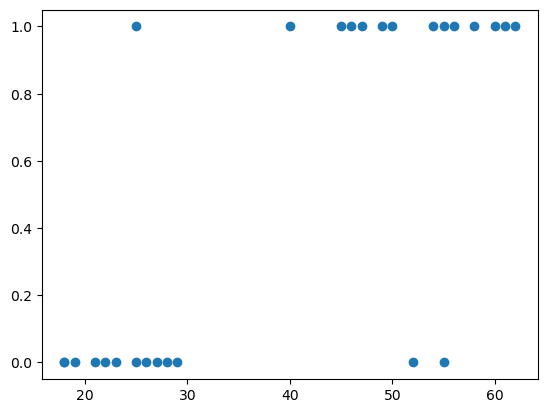

In [4]:
plt.scatter(df['age'], df['bought_insurance'])
plt.show()

## You can see a logistic function would fit the data very well

In [5]:

X = np.asarray([df['age']]).T
Y = np.asarray(df['bought_insurance'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)

### Finding the approximate average accuracy of the model for the dataset

In [9]:
model = LogisticRegression()
model.fit(x_train, y_train)
sum_acc = 0
#iterate through training and test
for i in range(1000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1, shuffle = True)
    model.fit(x_train, y_train)
    sum_acc += model.score(x_test, y_test) ##accuracy of model
#divide the summed accuracy by the number of iterations
print("Average accuracy: " + str(sum_acc/1000.0)) 




Average accuracy: 0.8676666666666633


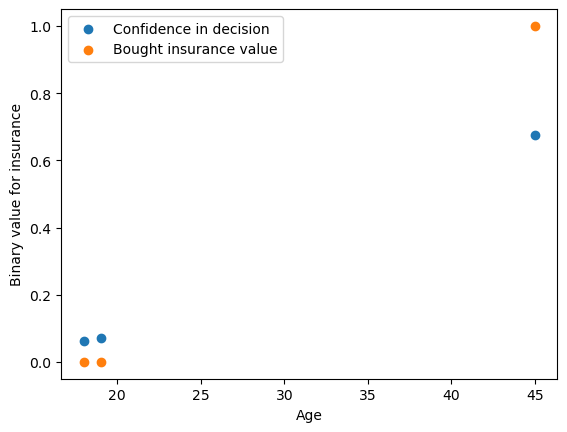

In [36]:
model.fit(x_train, y_train)
probability = model.predict_proba(x_test)
plt.scatter(x_test, probability[:, 1], label="Confidence in decision")
probability[:, 1]
plt.scatter(x_test, y_test, label="Bought insurance value")
plt.xlabel("Age")
plt.ylabel("Binary value for insurance")
plt.legend()

You can see how closely our probability is to the the actual binary value. If the model calculates a probability 0.5 >, then it will choose the binary value 1 whereas if it calculates a probability < O.5, it will predict the probabilty 1.0.

## More complex example with new goal: predict whether or not someone will resign or not based on HR data, this time with multiple field

In [183]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

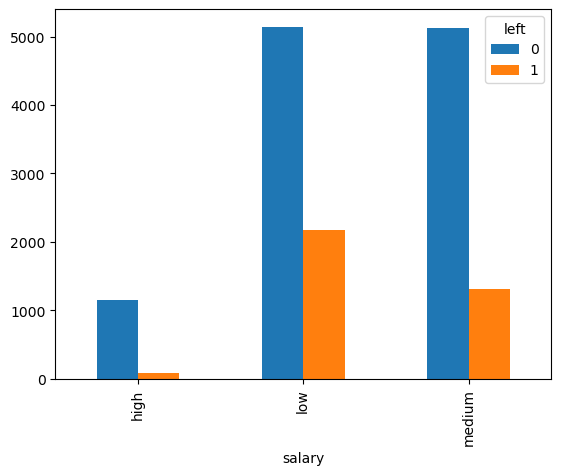

In [178]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

### you can see there is an effect on of salary on leaving so we need to find a way to include this

In [184]:
## split salary with three different fields
salary_split = pd.get_dummies(df.salary, prefix="salary", dtype=int)
salary_split


,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [193]:
df2 = pd.concat([df,salary_split],axis=1)

df2 = df2.drop('salary', axis=1)
df2 = df2.drop('Department', axis=1)

df2.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0


the data is now in the preprocessed form we desire with salary split as three different featueres

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

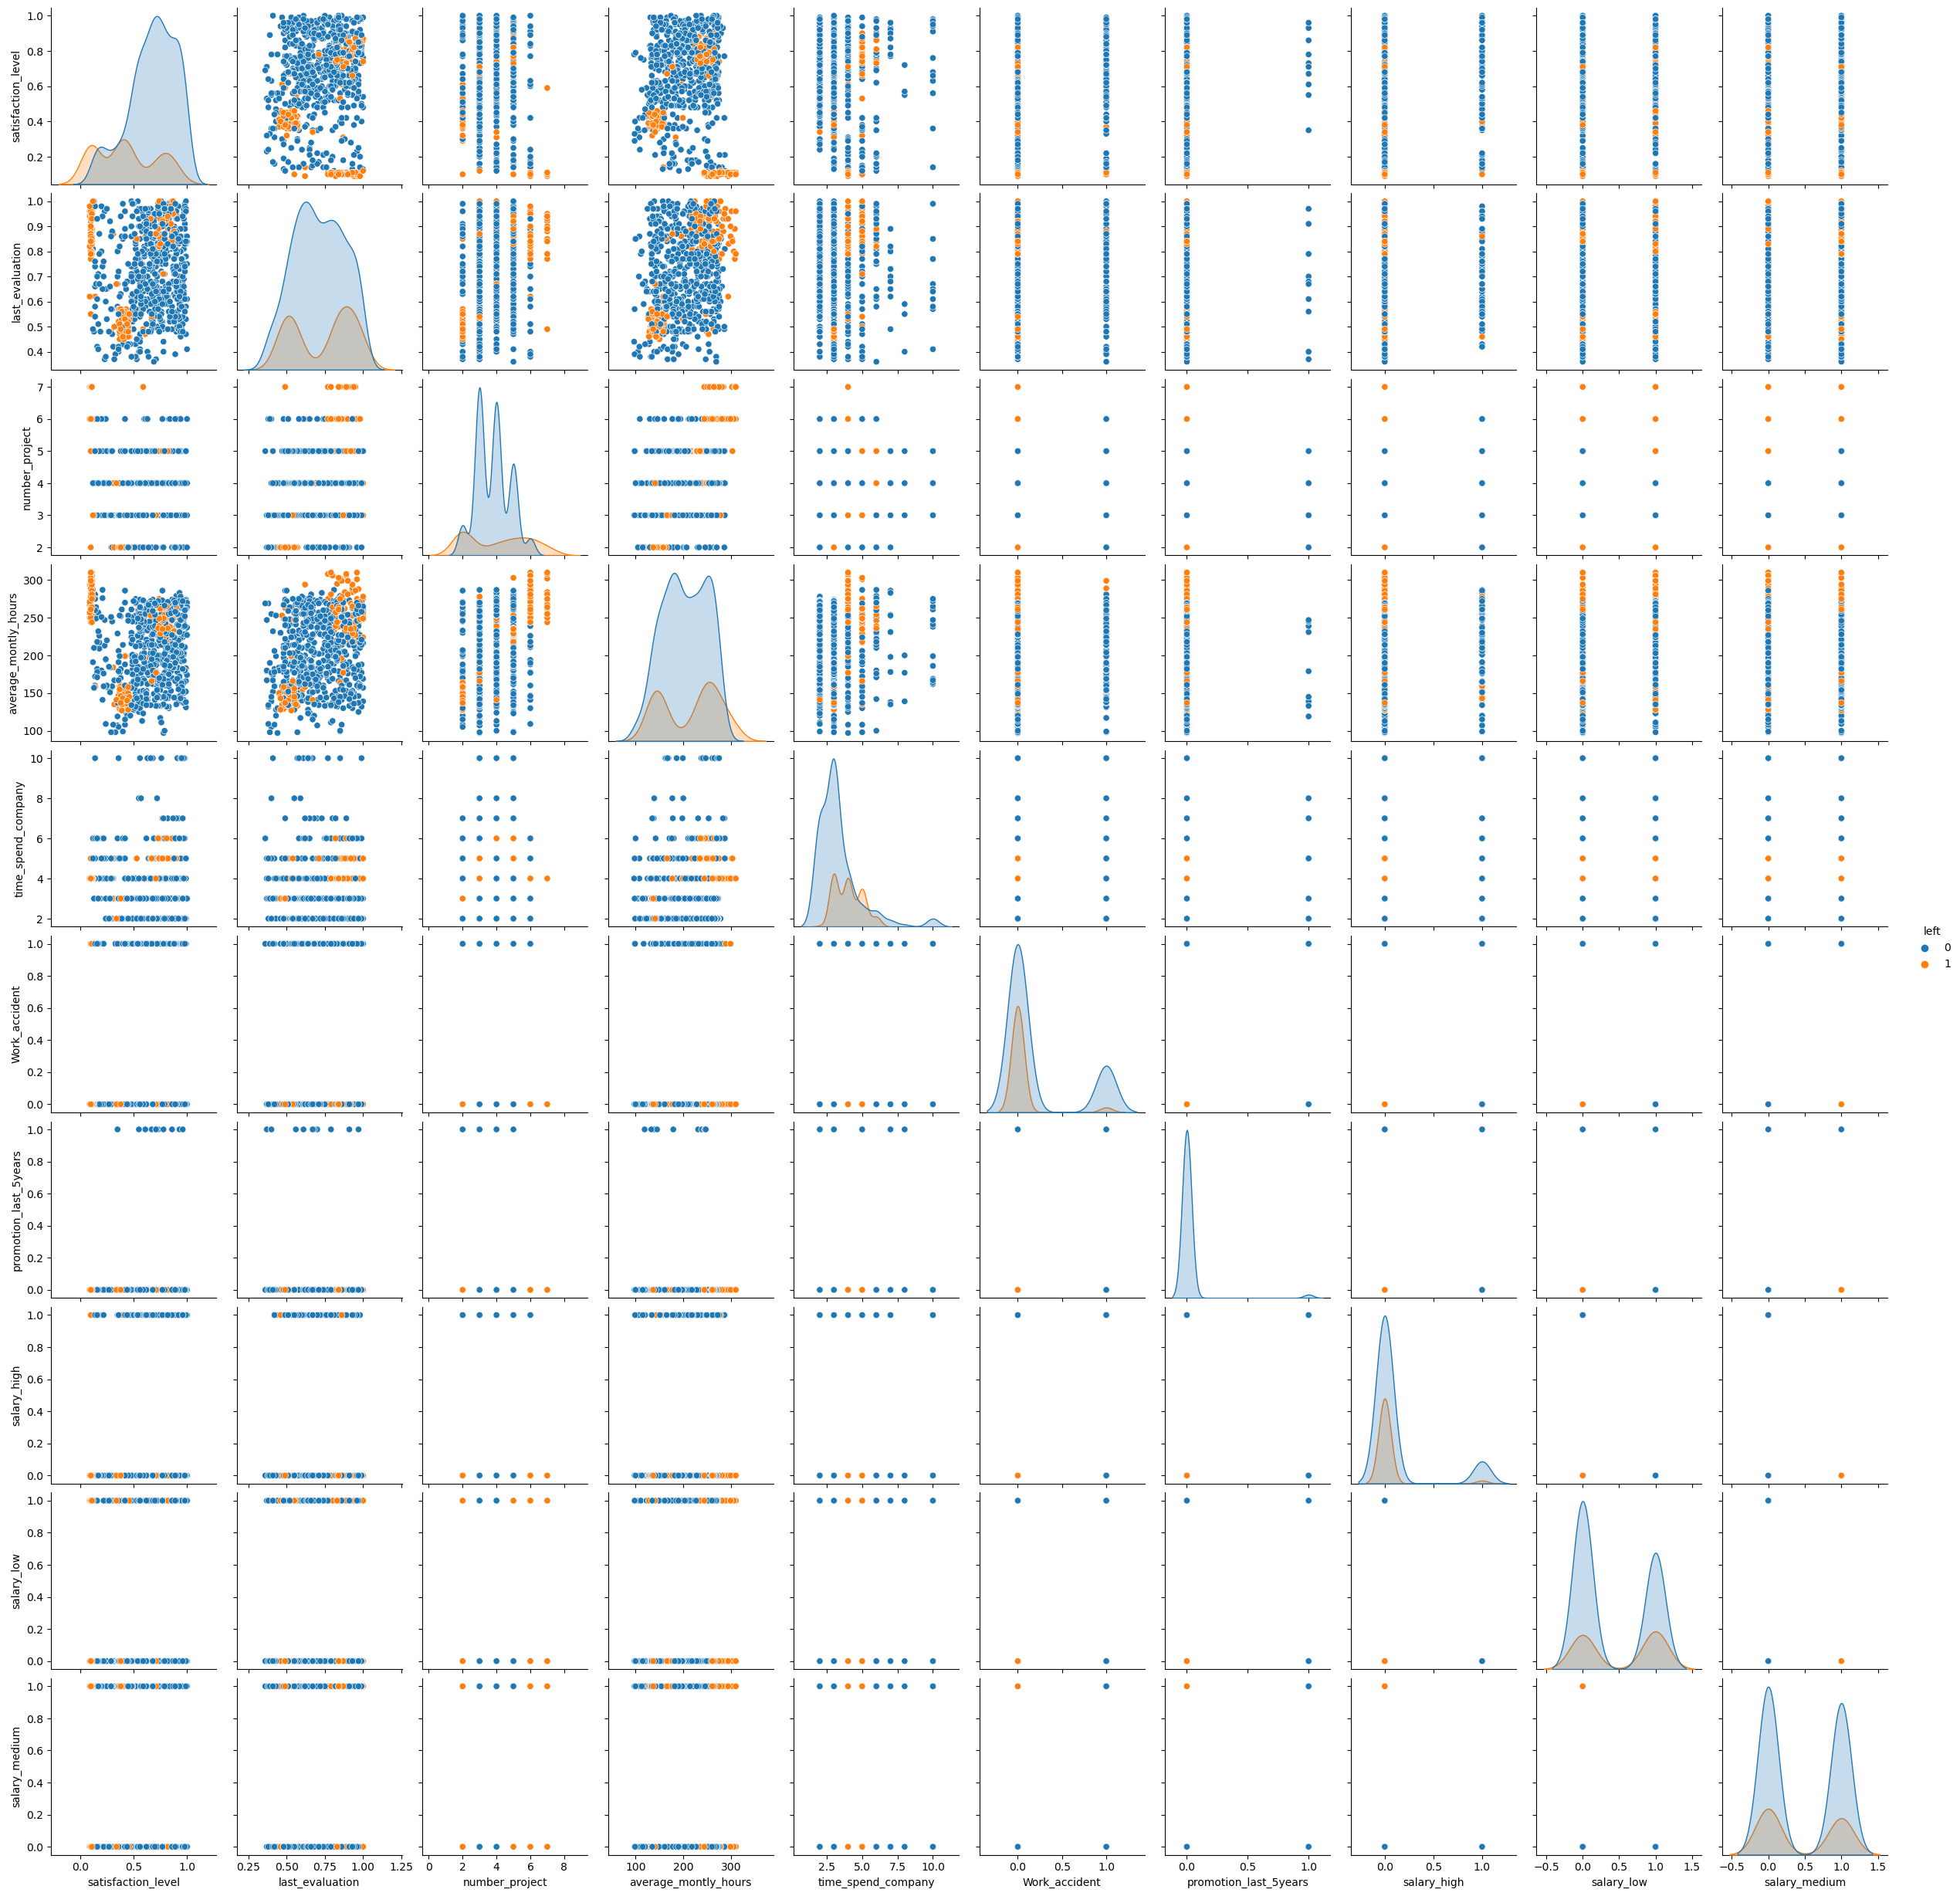

In [205]:
sample = df2.sample(frac=0.05)
sb.pairplot(sample, hue='left', diag_kind="kde", kind="scatter")
plt.show()

You can seem from the data there is some clear separations in the data

In [206]:
Y = df2['left']
X = df2.drop('left', axis=1)

X.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0


In [259]:
model = LogisticRegression(max_iter=1000) ##expand max_iter to 1000
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1, shuffle=True)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print("Accuracy of current model " + str(acc))


Accuracy of current model 0.7913333333333333


## Create confusion matrix to visualize the success of model

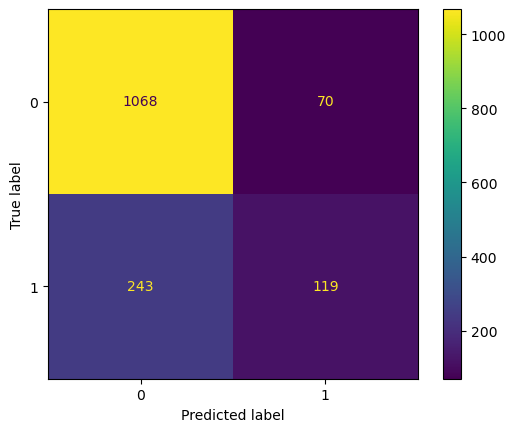

In [268]:
predictions = model.predict(x_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])
cm_display.plot()
plt.show()

As can be seen from the matrix, the current algorithm is highly successful in predicting true negative, but there are more false negatives than true positives, meaning perhaps a there is a better ML model available for this particular dataset.

# Multiclass classification with logistic regression

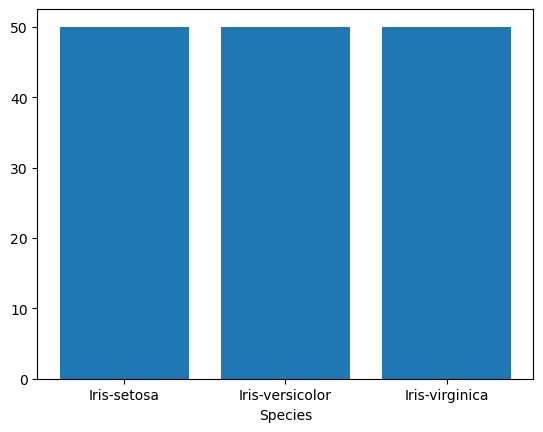

In [9]:
df = pd.read_csv('Iris.csv')

counts = df['Species'].value_counts()


fig, ax = plt.subplots()
ax.bar(counts.index, counts)
ax.set_xlabel(counts.index.name)
plt.show()


### You can see there are now three different classes present instead of the previous one

Now time to train and test the model

In [10]:
Y = df['Species']
X = df.drop('Species', axis=1)
model = LogisticRegression(max_iter=1000)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.3, shuffle=True)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print("Accuracy of current model " + str(acc))



Accuracy of current model 1.0


### A slicker way to create a confusion matrix with seaborn heatmaps

In [11]:
predictions = model.predict(x_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
confusion_matrix

array([[11,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 15]])

Text(50.72222222222221, 0.5, 'Actual values')

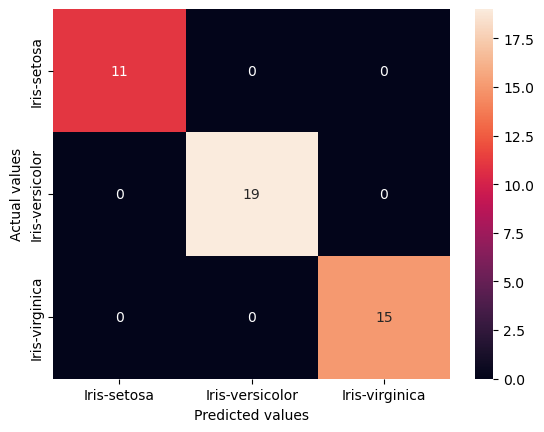

In [20]:
sb.heatmap(confusion_matrix, annot=True, xticklabels=counts.index, yticklabels=counts.index)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")


Text(0.5, 0, 'Species')

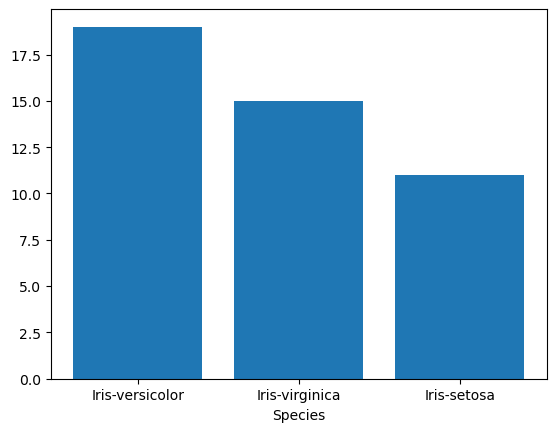

In [19]:
fig, ax = plt.subplots()
result_counts = y_test.value_counts()
ax.bar(result_counts.index, result_counts)
ax.set_xlabel(counts.index.name)